In [12]:
# Import necessary libraries
import urllib.request
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint
import os

In [13]:
# Step 2: Download dan Ekstrak Dataset
def download_and_extract():
    data_url_1 = 'https://github.com/dicodingacademy/assets/releases/download/release-horse-or-human/horse-or-human.zip'
    urllib.request.urlretrieve(data_url_1, 'horse-or-human.zip')
    with zipfile.ZipFile('horse-or-human.zip', 'r') as zip_ref:
        zip_ref.extractall('data/horse-or-human')

    data_url_2 = 'https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/validation-horse-or-human.zip'
    urllib.request.urlretrieve(data_url_2, 'validation-horse-or-human.zip')
    with zipfile.ZipFile('validation-horse-or-human.zip', 'r') as zip_ref:
        zip_ref.extractall('data/validation-horse-or-human')


In [14]:
# Step 3: Setup ImageDataGenerator
TRAINING_DIR = 'data/horse-or-human'
VALIDATION_DIR = 'data/validation-horse-or-human'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=32,
    class_mode='binary',
    target_size=(150, 150)
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=32,
    class_mode='binary',
    target_size=(150, 150)
)



Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [15]:
# Step 4: Membangun Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Final layer for binary classification
])

In [16]:
# Step 5: Compile Model
model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)



In [17]:
checkpoint = ModelCheckpoint(
    'model_05.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1
)

In [18]:
# Step 6: Train Model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    callbacks=[checkpoint]
)

Epoch 1/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5780 - loss: 1.0811
Epoch 1: val_accuracy improved from -inf to 0.69922, saving model to model_05.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5794 - loss: 1.0726 - val_accuracy: 0.6992 - val_loss: 0.5339
Epoch 2/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7665 - loss: 0.5631
Epoch 2: val_accuracy improved from 0.69922 to 0.70703, saving model to model_05.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.7667 - loss: 0.5617 - val_accuracy: 0.7070 - val_loss: 1.0754
Epoch 3/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8324 - loss: 0.3792
Epoch 3: val_accuracy improved from 0.70703 to 0.72656, saving model to model_05.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8332 - loss: 0.3779 - val_accuracy: 0.7266 - val_loss: 0.7913
Epoch 4/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8772 - loss: 0.2936
Epoch 4: val_accuracy did not improve from 0.72656
33/33 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.8777 - loss: 0.2924 - val_accuracy: 0.5625 - val_loss: 3.9354
Epoch 5/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8874 - loss: 0.2791
Epoch 5: val_accuracy improved from 0.72656 to 0.82422, saving model to model_05.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.8879 - loss: 0.2777 - val_accuracy: 0.8242 - val_loss: 0.8841
Epoch 6/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9470 - loss: 0.1673
Epoch 6: val_accuracy did not improve from 0.82422
33/33 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9469 - loss: 0.1673 - val_accuracy: 0.7969 - val_loss: 1.1307
Epoch 7/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9622 - loss: 0.1125
Epoch 7: val_accuracy improved from 0.82422 to 0.86719, saving model to model_05.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9619 - loss: 0.1128 - val_accuracy: 0.8672 - val_loss: 0.4976
Epoch 8/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9381 - loss: 0.1553
Epoch 8: val_accuracy did not improve from 0.86719
33/33 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9378 - loss: 0.1561 - val_accuracy: 0.7227 - val_loss: 1.8478
Epoch 9/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9616 - loss: 0.1029
Epoch 9: val_accuracy did not improve from 0.86719
33/33 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.9615 - loss: 0.1026 - val_accuracy: 0.7344 - val_loss: 2.7538
Epoch 10/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9690 - loss: 0.0918
Epoch 10: val_accuracy did not improve from 0.86719
33/33 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.9690 - loss: 0.0917 - val_accuracy: 0.6992 - val_loss: 2.6951
Epoch 11/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9586 - loss: 0.1065
Epoch 11: val_accuracy did not improve from 0.86719


In [23]:
best_val_accuracy = max(history.history['val_accuracy'])
best_epoch = history.history['val_accuracy'].index(best_val_accuracy) + 1

print(f"Validation Accuracy terbaik: {best_val_accuracy * 100:.2f}% (Epoch {best_epoch})")


Validation Accuracy terbaik: 86.72% (Epoch 7)


In [20]:
# Step 8: Simpan Model
model.save("model_05.h5")

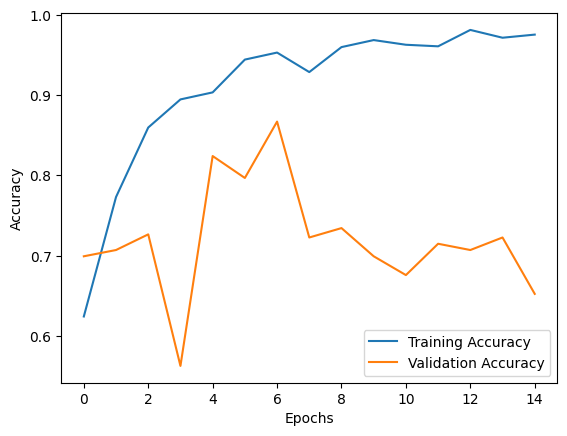

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()